In [3]:
!pip install pmdarima


     ------------------------------------ 569.7/569.7 kB 112.2 kB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 72.1 kB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.stats.diagnostic import acorr_ljungbox


            year month  passengers
date                              
1949-01-01  1949   Jan         112
1949-02-01  1949   Feb         118
1949-03-01  1949   Mar         132
1949-04-01  1949   Apr         129
1949-05-01  1949   May         121


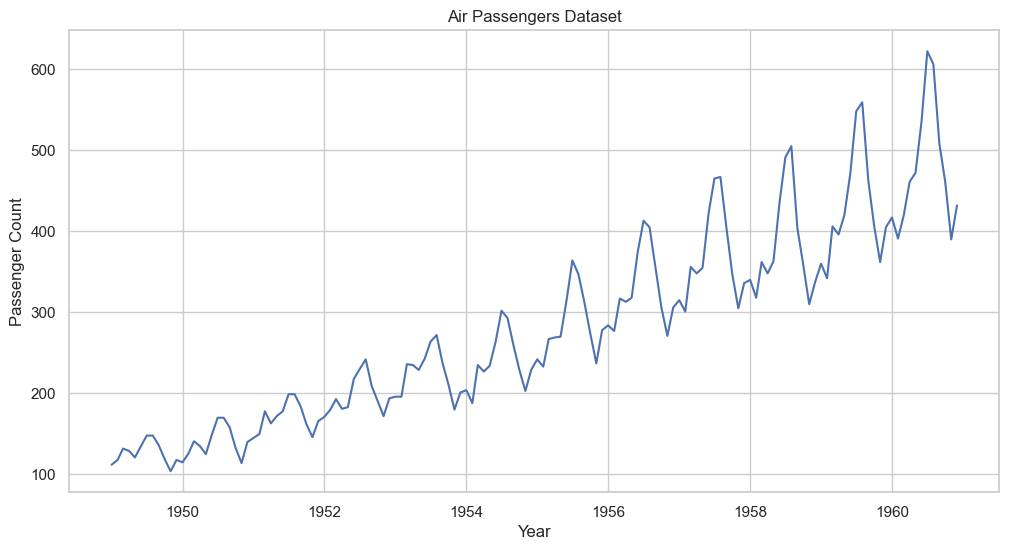

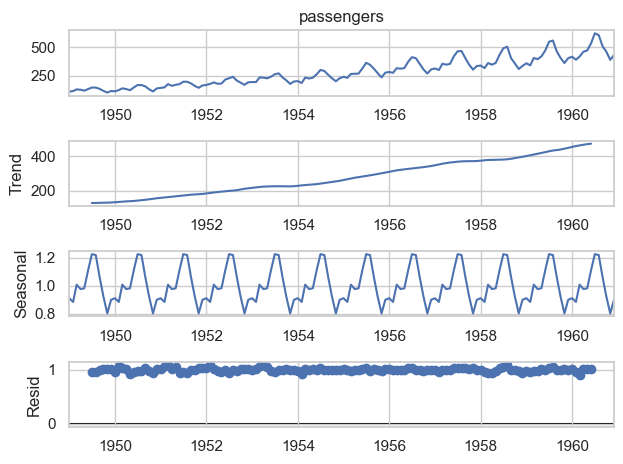

In [5]:

# Load the Air Passengers dataset from seaborn
sns.set(style="whitegrid")
data = sns.load_dataset("flights")

# Convert the 'year' and 'month' columns to a single datetime column
data['date'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str), format='%Y-%b')

# Set the 'date' column as the index
data.set_index('date', inplace=True)

# Display the first few rows of the dataset
print(data.head())

# Plot the passenger counts
plt.figure(figsize=(12, 6))
plt.plot(data['passengers'])
plt.title('Air Passengers Dataset')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.show()

# Perform seasonal decomposition
result = seasonal_decompose(data['passengers'], model='multiplicative')

# Plot the decomposition components
result.plot()
plt.show()


In [6]:
# Fit an auto ARIMA model
model = auto_arima(data['passengers'], seasonal=True, m=12, suppress_warnings=True)
print(model.summary())

# Get the residuals
residuals = model.resid()



                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Sun, 13 Aug 2023   AIC                           1017.847
Time:                                     17:07:22   BIC                           1029.348
Sample:                                 01-01-1949   HQIC                          1022.520
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      

     lb_stat  lb_pvalue
10  5.583055   0.848993


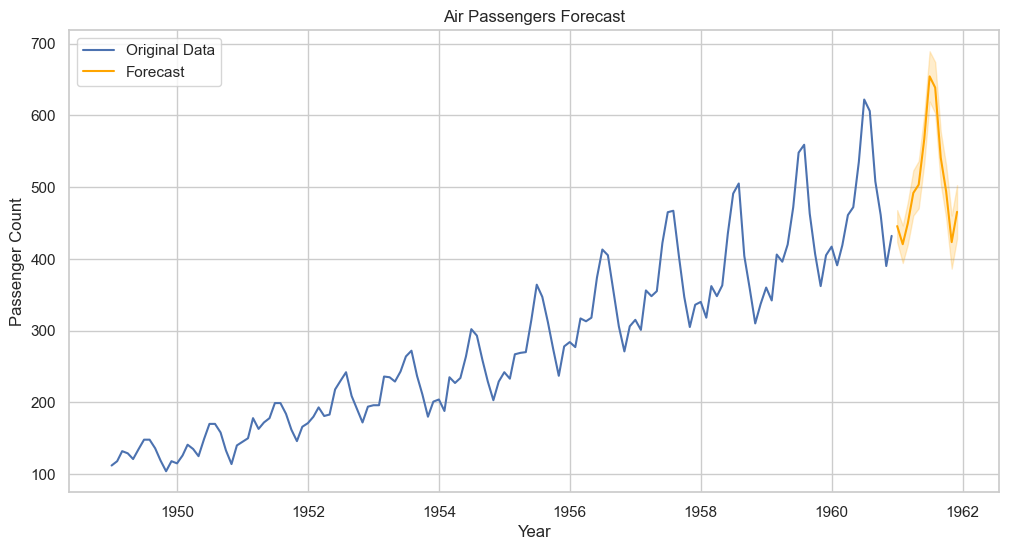

In [7]:
# Perform Ljung-Box test
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(lb_test)

# Forecast future values
forecast, conf_int = model.predict(n_periods=12, return_conf_int=True)

# Create a dataframe to store the forecasted values and confidence intervals
forecast_df = pd.DataFrame({'forecast': forecast, 'lower_bound': conf_int[:, 0], 'upper_bound': conf_int[:, 1]})

# Plot the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['passengers'], label='Original Data')
plt.plot(forecast_df.index, forecast_df['forecast'], label='Forecast', color='orange')
plt.fill_between(forecast_df.index, forecast_df['lower_bound'], forecast_df['upper_bound'], color='orange', alpha=0.2)
plt.title('Air Passengers Forecast')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()
